In [221]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [222]:
df_original = pd.read_csv("insurance.csv")
df = df_original.copy()

In [223]:
df.head().T

0          1          2          3          4
age              19         18         28         33         32
sex          female       male       male       male       male
bmi            27.9      33.77         33     22.705      28.88
children          0          1          3          0          0
smoker          yes         no         no         no         no
region    southwest  southeast  southeast  northwest  northwest
charges     16884.9    1725.55    4449.46    21984.5    3866.86

In [224]:
df.dropna(inplace=True)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [226]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

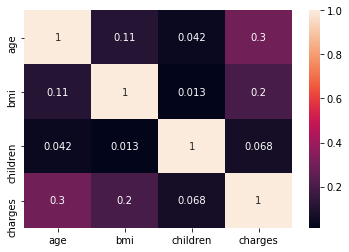

In [227]:
sns.heatmap(df.corr(), annot=True);

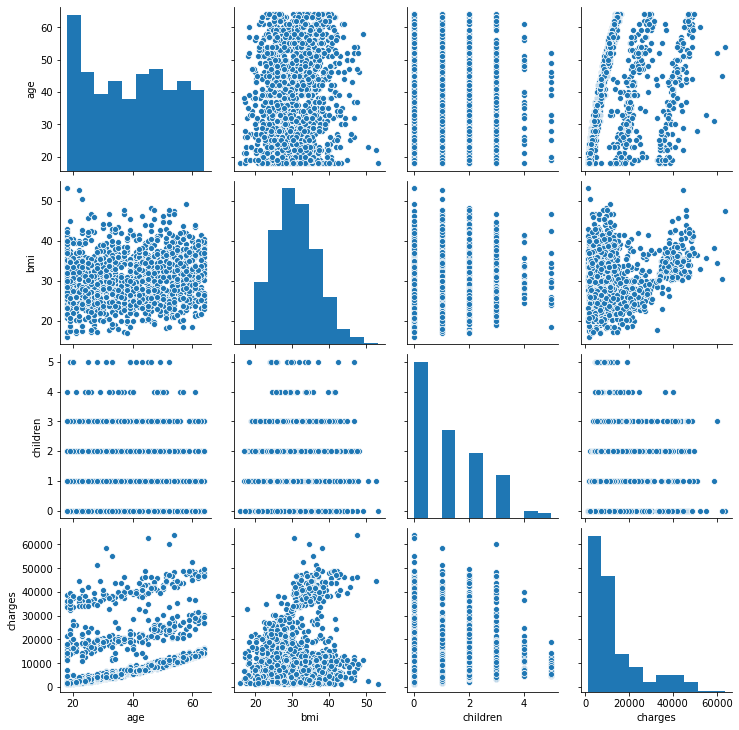

In [228]:
sns.pairplot(df);

In [229]:
df.groupby(["region"]).mean()

age        bmi  children       charges
region                                                 
northeast  39.268519  29.173503  1.046296  13406.384516
northwest  39.196923  29.199785  1.147692  12417.575374
southeast  38.939560  33.355989  1.049451  14735.411438
southwest  39.455385  30.596615  1.141538  12346.937377

In [230]:
# df["m_features"] = pd.get_dummies(df["sex"])
# df["s_features"] = pd.get_dummies(df["smoker"])
# df["r_features"] = pd.get_dummies(df["region"])
# pd.get_dummies(df, prefix=["sex", "smoker", "region"])
cat_col = ["sex", "smoker"]
df = pd.get_dummies(df, columns=cat_col, drop_first=True)
df

age     bmi  children     region      charges  sex_male  smoker_yes
0      19  27.900         0  southwest  16884.92400         0           1
1      18  33.770         1  southeast   1725.55230         1           0
2      28  33.000         3  southeast   4449.46200         1           0
3      33  22.705         0  northwest  21984.47061         1           0
4      32  28.880         0  northwest   3866.85520         1           0
...   ...     ...       ...        ...          ...       ...         ...
1333   50  30.970         3  northwest  10600.54830         1           0
1334   18  31.920         0  northeast   2205.98080         0           0
1335   18  36.850         0  southeast   1629.83350         0           0
1336   21  25.800         0  southwest   2007.94500         0           0
1337   61  29.070         0  northwest  29141.36030         0           1

[1338 rows x 7 columns]

In [231]:
df = pd.get_dummies(df)
df

age     bmi  children      charges  sex_male  smoker_yes  \
0      19  27.900         0  16884.92400         0           1   
1      18  33.770         1   1725.55230         1           0   
2      28  33.000         3   4449.46200         1           0   
3      33  22.705         0  21984.47061         1           0   
4      32  28.880         0   3866.85520         1           0   
...   ...     ...       ...          ...       ...         ...   
1333   50  30.970         3  10600.54830         1           0   
1334   18  31.920         0   2205.98080         0           0   
1335   18  36.850         0   1629.83350         0           0   
1336   21  25.800         0   2007.94500         0           0   
1337   61  29.070         0  29141.36030         0           1   

      region_northeast  region_northwest  region_southeast  region_southwest  
0                    0                 0                 0                 1  
1                    0                 0                 1                 0  
2                    0                 0                 1                 0  
3                    0                 1                 0                 0  
4                    0                 1                 0                 0  
...                ...               ...               ...               ...  
1333                 0                 1                 0                 0  
1334                 1                 0                 0                 0  
1335                 0                 0                 1                 0  
1336                 0                 0                 0                 1  
1337                 0                 1                 0                 0  

[1338 rows x 10 columns]

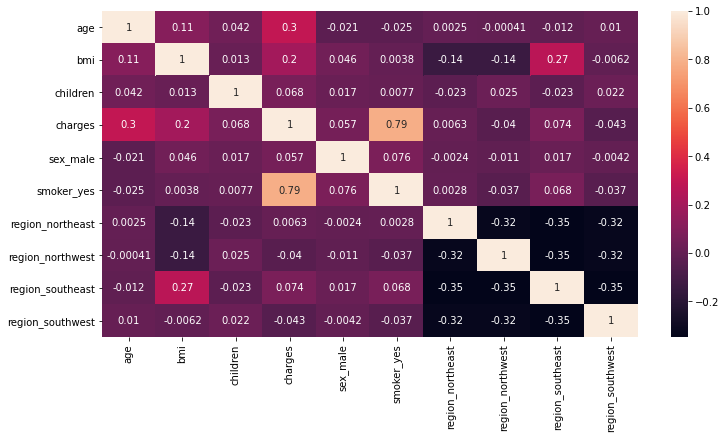

In [232]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True);

In [244]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [245]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [246]:
X = df[['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest']]

y = df['charges']

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [248]:
# from sklearn.linear_model import LinearRegression

In [256]:
# lm = LinearRegression()
xgb_model = xgb.XGBRegressor(booster="gblinear")

In [257]:
# lm.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.5, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=None, random_state=0,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=None,
             tree_method=None, validate_parameters=1, verbosity=None)

In [259]:
xgb_model.intercept_

array([-2948.07])

In [260]:
xgb_model.coef_

array([  253.223,   235.824,   489.878,  -117.959, 23482.7  , -5676.78 ,
       -5881.13 , -6150.55 , -6787.08 ])

In [272]:
coef = pd.DataFrame(xgb_model.coef_, X.columns, columns=["Coefficents"])
coef.sort_values(by=["Coefficents"], ascending=True)

Coefficents
region_southwest    -6787.080
region_southeast    -6150.550
region_northwest    -5881.130
region_northeast    -5676.780
sex_male             -117.959
bmi                   235.824
age                   253.223
children              489.878
smoker_yes          23482.700